In [1]:
import os 
import numpy as np
import pandas as pd 
from tqdm import tqdm
import glob 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torchvision
import torchvision.models as models 
import torchvision.transforms as transforms 
import torchvision.datasets as datasets
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [ ]:
ROOT_PATH = 'C:/Users/manu_/OneDrive - Universitaet Bern/03 HS24 UniBe-VIVO/05 Diabetes Management/archive'
training_path = f'{ROOT_PATH}/training'
validation_path = f'{ROOT_PATH}/validation'
evaluation_path = f'{ROOT_PATH}/evaluation'

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
batch_size = 32 
image_size = 224

mean = [0.485, 0.456, 0.406]    # wieso diese werte?
std = [0.229, 0.224, 0.225]

In [5]:
main_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

aug_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1, 0.1, 0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    transforms.RandomErasing()
])

In [6]:
model = models.resnet50(weights='IMAGENET1K_V1')    # wieso diese weights??

In [7]:
in_features = int(model.fc.in_features)
model.fc = nn.Linear(in_features, 11, device)

In [8]:
model = model.to(device)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [10]:
train_dataset = datasets.ImageFolder(training_path, transform=aug_transform)
evaluation_dataset = datasets.ImageFolder(evaluation_path, transform=main_transform)

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
evaluation_dataloader = DataLoader(evaluation_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].


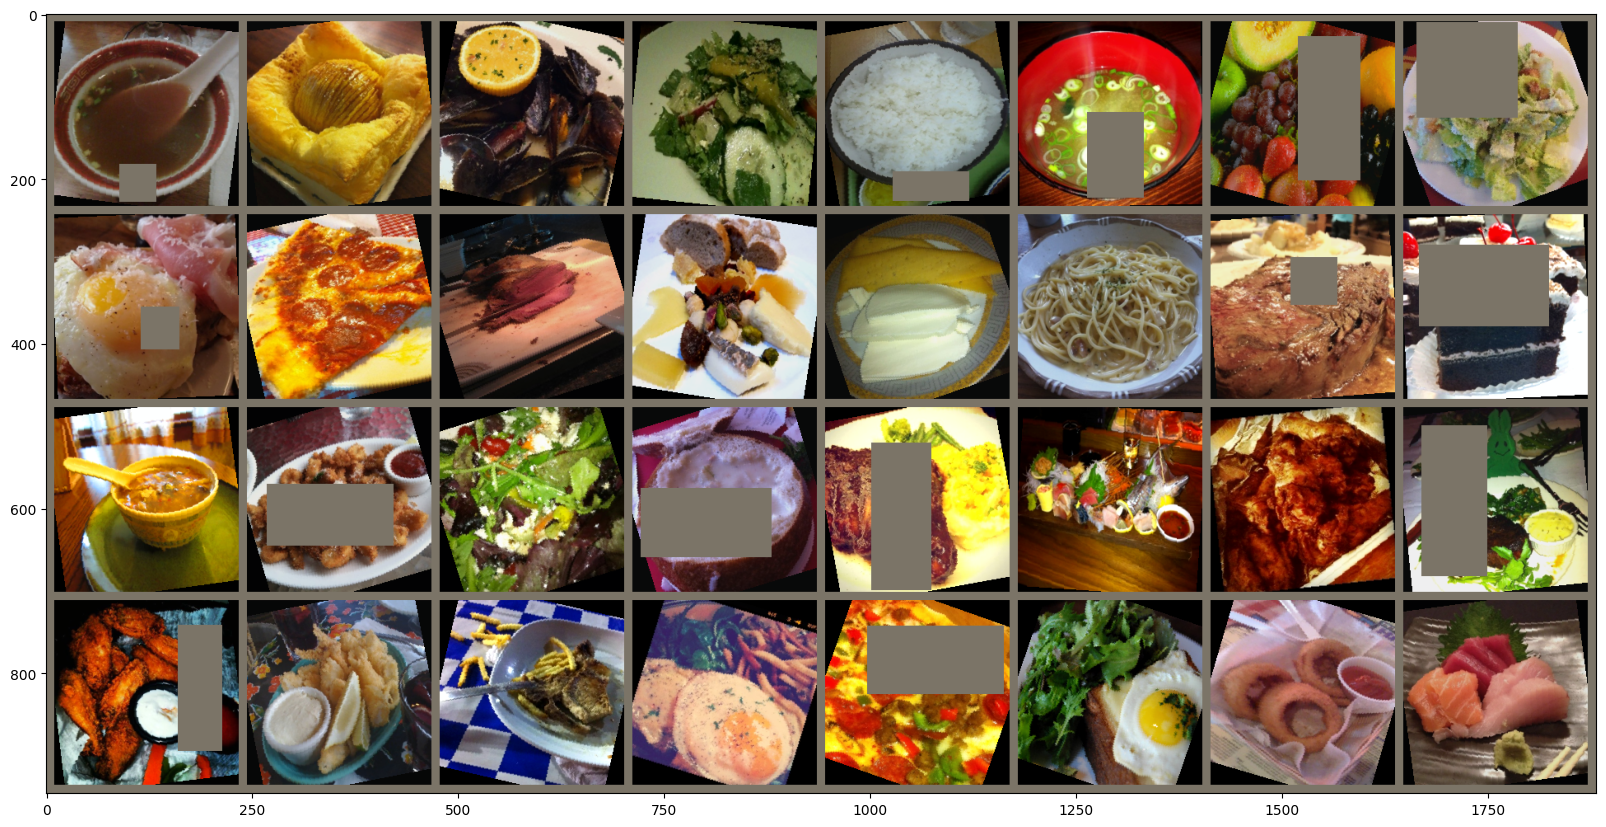

In [12]:
images, targets = next(iter(train_dataloader))
grid_images = torchvision.utils.make_grid(images, nrow=8, padding=10)

def imshow(images, mean, std):
    np_image = np.array(images).transpose((1, 2, 0))
    unnorm_image = np_image * std + mean
    plt.figure(figsize=(20, 20))
    plt.imshow(unnorm_image)
    
imshow(grid_images, mean, std)

In [34]:
num_epochs = 3
losses = [] 

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(tqdm(train_dataloader)):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 50 == 0:
            print('Epoch [%2d/%2d], Step [%3d/%3d], Loss: %.4f' % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.item()))

 16%|█▌        | 50/309 [04:06<19:55,  4.62s/it] 

Epoch [ 1/ 3], Step [ 50/308], Loss: 1.6851


 32%|███▏      | 100/309 [07:56<15:46,  4.53s/it]

Epoch [ 1/ 3], Step [100/308], Loss: 1.1354


 49%|████▊     | 150/309 [11:46<12:38,  4.77s/it]

Epoch [ 1/ 3], Step [150/308], Loss: 0.7329


 65%|██████▍   | 200/309 [15:46<08:29,  4.68s/it]

Epoch [ 1/ 3], Step [200/308], Loss: 0.8589


 81%|████████  | 250/309 [19:38<04:32,  4.63s/it]

Epoch [ 1/ 3], Step [250/308], Loss: 0.6780


 97%|█████████▋| 300/309 [23:26<00:41,  4.64s/it]

Epoch [ 1/ 3], Step [300/308], Loss: 0.6659


 16%|█▌        | 50/309 [03:53<19:22,  4.49s/it] 

Epoch [ 2/ 3], Step [ 50/308], Loss: 0.3625


 32%|███▏      | 100/309 [07:37<15:16,  4.38s/it]

Epoch [ 2/ 3], Step [100/308], Loss: 0.6944


 49%|████▊     | 150/309 [9:12:23<3:06:32, 70.39s/it]    

Epoch [ 2/ 3], Step [150/308], Loss: 0.3384


 65%|██████▍   | 200/309 [9:15:49<07:29,  4.13s/it]  

Epoch [ 2/ 3], Step [200/308], Loss: 0.4362


 81%|████████  | 250/309 [9:19:15<04:06,  4.17s/it]

Epoch [ 2/ 3], Step [250/308], Loss: 0.2927


 97%|█████████▋| 300/309 [9:22:41<00:37,  4.14s/it]

Epoch [ 2/ 3], Step [300/308], Loss: 0.3183


 16%|█▌        | 50/309 [5:48:17<31:16,  7.24s/it]      

Epoch [ 3/ 3], Step [ 50/308], Loss: 0.2609


 32%|███▏      | 100/309 [5:53:37<20:20,  5.84s/it]

Epoch [ 3/ 3], Step [100/308], Loss: 0.3275


 49%|████▊     | 150/309 [5:59:16<16:42,  6.30s/it]

Epoch [ 3/ 3], Step [150/308], Loss: 0.8586


 65%|██████▍   | 200/309 [6:04:45<11:32,  6.35s/it]

Epoch [ 3/ 3], Step [200/308], Loss: 0.3827


 81%|████████  | 250/309 [6:10:16<06:24,  6.52s/it]

Epoch [ 3/ 3], Step [250/308], Loss: 0.5549


 97%|█████████▋| 300/309 [6:15:32<00:58,  6.55s/it]

Epoch [ 3/ 3], Step [300/308], Loss: 0.3428


100%|██████████| 309/309 [6:16:21<00:00, 73.08s/it]


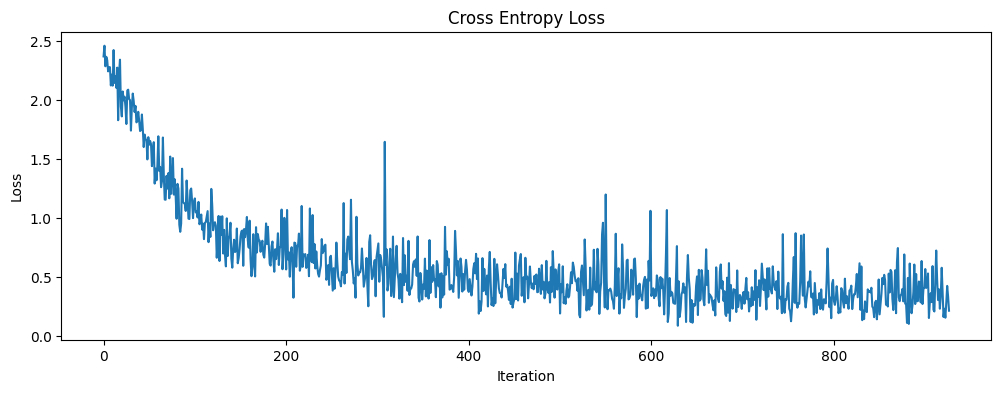

In [35]:
plt.figure(figsize=(12, 4))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss')
plt.show()

In [36]:
def evaluate_model(model, dataloader, device):
    model.eval()
    corrects = 0
    
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
    print(f'accuracy: {100.0 * corrects / len(dataloader.dataset)}')

In [37]:
evaluate_model(model, evaluation_dataloader, device)

accuracy: 90.73797607421875
